In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [ ]:
import pandas as pd
df = pd.read_csv("2nd Quantative data set.csv") # Reading CSV data
df

,Age,Gender,Religion,Education,Location,Programstudied,PersonalFinance,MaritalStatuts,Devices,Source,...,BFAD,INAD,FAD,Age_cat,MLP_PredictedValue,MLP_PseudoProbability_1,MLP_PseudoProbability_2,BFAD_CAT,SMA,FRESMA
0,26,1,1,1,4,3,1,1,1,4,...,12,2,2,1,2,.432604931695505,.567395068304495,2,1,2
1,27,1,1,1,3,3,1,1,2,3,...,13,2,2,1,2,.432604931695505,.567395068304495,2,2,2
2,25,2,1,1,4,1,2,2,3,4,...,14,1,1,1,2,.467755731155667,.532244268844333,2,2,2
3,27,1,1,3,4,2,2,2,3,4,...,15,2,2,1,2,.432604931695505,.567395068304495,2,2,2
4,28,2,1,3,4,3,1,3,2,4,...,30,2,2,1,2,.432604931695505,.567395068304495,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,,,,,,,,,,,...,,,,,,,,,,
478,,,,,,,,,,,...,,,,,,,,,,
479,,,,,,,,,,,...,,,,,,,,,,
480,,,,,,,,,,,...,,,,,,,,,,


In [ ]:
df

,Age,Gender,Religion,Education,Location,Programstudied,PersonalFinance,MaritalStatuts,Devices,Source,...,BFAD,INAD,FAD,Age_cat,MLP_PredictedValue,MLP_PseudoProbability_1,MLP_PseudoProbability_2,BFAD_CAT,SMA,FRESMA
0,26,1,1,1,4,3,1,1,1,4,...,12,2,2,1,2,.432604931695505,.567395068304495,2,1,2
1,27,1,1,1,3,3,1,1,2,3,...,13,2,2,1,2,.432604931695505,.567395068304495,2,2,2
2,25,2,1,1,4,1,2,2,3,4,...,14,1,1,1,2,.467755731155667,.532244268844333,2,2,2
3,27,1,1,3,4,2,2,2,3,4,...,15,2,2,1,2,.432604931695505,.567395068304495,2,2,2
4,28,2,1,3,4,3,1,3,2,4,...,30,2,2,1,2,.432604931695505,.567395068304495,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,,,,,,,,,,,...,,,,,,,,,,
478,,,,,,,,,,,...,,,,,,,,,,
479,,,,,,,,,,,...,,,,,,,,,,
480,,,,,,,,,,,...,,,,,,,,,,


In [ ]:
df.dtypes

Age                        object
Gender                     object
Religion                   object
Education                  object
Location                   object
Programstudied             object
PersonalFinance            object
MaritalStatuts             object
Devices                    object
Source                     object
Disorder                   object
ParentingStyle             object
MentalHealth               object
Backpain                   object
Eyestrain                  object
RExercise                  object
SLDU                       object
Stress                     object
FBhours                    object
FBA                        object
FPS                        object
FRS                        object
FUS                        object
FSS                        object
FSTS                       object
BFAD                       object
INAD                       object
FAD                        object
Age_cat                    object
MLP_PredictedV

In [ ]:
# Removing Naan and Error reduction:
cols = df.columns[df.dtypes.eq('object')]

df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')


In [ ]:

df.dtypes

Age                        float64
Gender                     float64
Religion                   float64
Education                  float64
Location                   float64
Programstudied             float64
PersonalFinance            float64
MaritalStatuts             float64
Devices                    float64
Source                     float64
Disorder                   float64
ParentingStyle             float64
MentalHealth               float64
Backpain                   float64
Eyestrain                  float64
RExercise                  float64
SLDU                       float64
Stress                     float64
FBhours                    float64
FBA                        float64
FPS                        float64
FRS                        float64
FUS                        float64
FSS                        float64
FSTS                       float64
BFAD                       float64
INAD                       float64
FAD                        float64
Age_cat             

In [ ]:
cols = df.columns[df.dtypes.eq('object')]
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [ ]:
df.dtypes

Age                        float64
Gender                     float64
Religion                   float64
Education                  float64
Location                   float64
Programstudied             float64
PersonalFinance            float64
MaritalStatuts             float64
Devices                    float64
Source                     float64
Disorder                   float64
ParentingStyle             float64
MentalHealth               float64
Backpain                   float64
Eyestrain                  float64
RExercise                  float64
SLDU                       float64
Stress                     float64
FBhours                    float64
FBA                        float64
FPS                        float64
FRS                        float64
FUS                        float64
FSS                        float64
FSTS                       float64
BFAD                       float64
INAD                       float64
FAD                        float64
Age_cat             

In [ ]:
df.corr()

,Age,Gender,Religion,Education,Location,Programstudied,PersonalFinance,MaritalStatuts,Devices,Source,...,BFAD,INAD,FAD,Age_cat,MLP_PredictedValue,MLP_PseudoProbability_1,MLP_PseudoProbability_2,BFAD_CAT,SMA,FRESMA
Age,1.000000,0.001919,-0.095123,0.063228,-0.100886,-0.068206,0.015984,-0.126479,0.032136,-0.100886,...,0.208802,-0.075212,-0.075212,0.882073,NaN,0.082823,-0.082823,0.138784,0.115882,0.005277
Gender,0.001919,1.000000,-0.022722,-0.032333,-0.055744,0.125302,-0.004946,0.139120,-0.073880,-0.055744,...,-0.133867,0.053169,0.053169,0.026235,NaN,-0.059391,0.059391,-0.134762,-0.003776,-0.036788
Religion,-0.095123,-0.022722,1.000000,0.060702,-0.132313,-0.150055,-0.060947,0.055927,0.028186,-0.132313,...,-0.054617,-0.033218,-0.033218,-0.040880,NaN,0.009543,-0.009543,-0.025281,0.084074,0.021912
Education,0.063228,-0.032333,0.060702,1.000000,0.030937,-0.042132,-0.074553,0.023238,-0.051717,0.030937,...,0.143588,-0.111396,-0.111396,0.027223,NaN,0.103667,-0.103667,0.125593,0.107406,0.024534
Location,-0.100886,-0.055744,-0.132313,0.030937,1.000000,-0.135813,0.174344,0.056987,-0.032435,1.000000,...,-0.072843,0.113416,0.113416,-0.114820,NaN,-0.064664,0.064664,-0.062021,-0.038006,-0.107324
Programstudied,-0.068206,0.125302,-0.150055,-0.042132,-0.135813,1.000000,-0.001541,-0.067482,0.119636,-0.135813,...,-0.121761,-0.049912,-0.049912,-0.119807,NaN,0.049474,-0.049474,-0.064211,0.036476,0.107498
PersonalFinance,0.015984,-0.004946,-0.060947,-0.074553,0.174344,-0.001541,1.000000,-0.030677,0.064419,0.174344,...,-0.090370,0.004338,0.004338,0.035353,NaN,0.007473,-0.007473,-0.040722,-0.128102,-0.013602
MaritalStatuts,-0.126479,0.139120,0.055927,0.023238,0.056987,-0.067482,-0.030677,1.000000,-0.021631,0.056987,...,0.066634,-0.007284,-0.007284,-0.109446,NaN,0.011101,-0.011101,0.004691,-0.035754,0.069850
Devices,0.032136,-0.073880,0.028186,-0.051717,-0.032435,0.119636,0.064419,-0.021631,1.000000,-0.032435,...,0.101289,-0.175774,-0.175774,-0.016271,NaN,0.237241,-0.237241,0.014506,0.044805,-0.107564
Source,-0.100886,-0.055744,-0.132313,0.030937,1.000000,-0.135813,0.174344,0.056987,-0.032435,1.000000,...,-0.072843,0.113416,0.113416,-0.114820,NaN,-0.064664,0.064664,-0.062021,-0.038006,-0.107324


<Axes: >

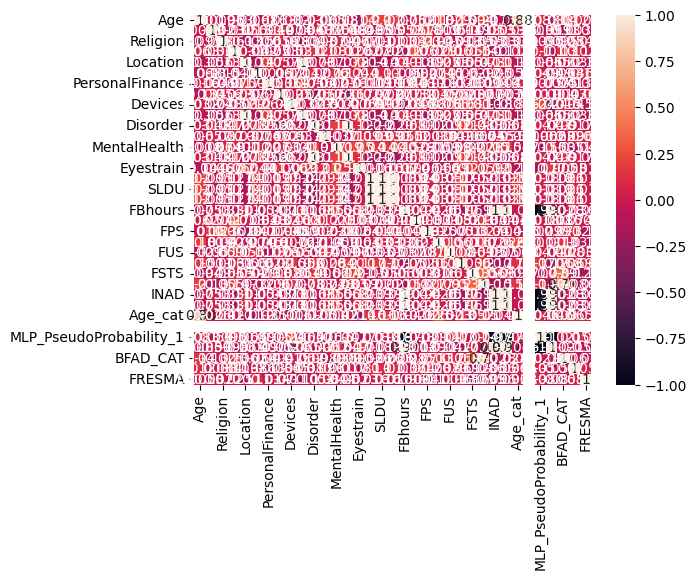

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.describe()

,Age,Gender,Religion,Education,Location,Programstudied,PersonalFinance,MaritalStatuts,Devices,Source,...,BFAD,INAD,FAD,Age_cat,MLP_PredictedValue,MLP_PseudoProbability_1,MLP_PseudoProbability_2,BFAD_CAT,SMA,FRESMA
count,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,...,128.000000,128.000000,128.000000,128.000000,128.0,128.000000,128.000000,128.000000,128.000000,128.000000
mean,29.15625,1.578125,1.187500,1.578125,3.203125,3.046875,1.515625,1.882812,2.625000,3.203125,...,16.453125,2.179688,2.179688,1.429688,2.0,0.414868,0.585132,2.078125,2.273438,2.179688
std,3.62067,0.495799,0.611568,0.874930,0.863607,0.954553,0.501719,0.647480,0.913589,0.863607,...,3.978009,0.508721,0.508721,0.728320,0.0,0.037591,0.037591,0.445615,0.985843,0.991568
min,23.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,1.000000,1.000000,1.000000,2.0,0.348725,0.532244,1.000000,1.000000,1.000000
25%,26.00000,1.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000,2.000000,3.000000,...,14.000000,2.000000,2.000000,1.000000,2.0,0.432605,0.567395,2.000000,2.000000,1.000000
50%,29.00000,2.000000,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,...,16.000000,2.000000,2.000000,1.000000,2.0,0.432605,0.567395,2.000000,2.000000,2.000000
75%,31.25000,2.000000,1.000000,3.000000,4.000000,4.000000,2.000000,2.000000,3.000000,4.000000,...,19.000000,2.000000,2.000000,2.000000,2.0,0.432605,0.567395,2.000000,3.000000,3.000000
max,40.00000,2.000000,5.000000,3.000000,4.000000,4.000000,2.000000,3.000000,4.000000,4.000000,...,30.000000,3.000000,3.000000,4.000000,2.0,0.467756,0.651275,3.000000,4.000000,4.000000


In [ ]:
df.mean()

Age                        29.156250
Gender                      1.578125
Religion                    1.187500
Education                   1.578125
Location                    3.203125
Programstudied              3.046875
PersonalFinance             1.515625
MaritalStatuts              1.882812
Devices                     2.625000
Source                      3.203125
Disorder                    1.656250
ParentingStyle              1.976562
MentalHealth                1.945312
Backpain                    1.656250
Eyestrain                   1.890625
RExercise                   1.265625
SLDU                        1.265625
Stress                      1.265625
FBhours                     2.179688
FBA                         2.289062
FPS                         2.664062
FRS                         2.437500
FUS                         3.007812
FSS                         3.132812
FSTS                        2.718750
BFAD                       16.453125
INAD                        2.179688
F

In [ ]:
df.mode()

,Age,Gender,Religion,Education,Location,Programstudied,PersonalFinance,MaritalStatuts,Devices,Source,...,BFAD,INAD,FAD,Age_cat,MLP_PredictedValue,MLP_PseudoProbability_1,MLP_PseudoProbability_2,BFAD_CAT,SMA,FRESMA
0,27.0,2.0,1.0,1.0,4.0,3.0,2.0,2.0,3.0,4.0,...,15.0,2.0,2.0,1.0,2.0,0.432605,0.567395,2.0,2.0,2.0


In [ ]:

df.median()

Age                        29.000000
Gender                      2.000000
Religion                    1.000000
Education                   1.000000
Location                    3.000000
Programstudied              3.000000
PersonalFinance             2.000000
MaritalStatuts              2.000000
Devices                     3.000000
Source                      3.000000
Disorder                    2.000000
ParentingStyle              2.000000
MentalHealth                2.000000
Backpain                    2.000000
Eyestrain                   2.000000
RExercise                   1.000000
SLDU                        1.000000
Stress                      1.000000
FBhours                     2.000000
FBA                         2.000000
FPS                         3.000000
FRS                         2.500000
FUS                         3.000000
FSS                         3.000000
FSTS                        3.000000
BFAD                       16.000000
INAD                        2.000000
F

In [ ]:
df.cov()

,Age,Gender,Religion,Education,Location,Programstudied,PersonalFinance,MaritalStatuts,Devices,Source,...,BFAD,INAD,FAD,Age_cat,MLP_PredictedValue,MLP_PseudoProbability_1,MLP_PseudoProbability_2,BFAD_CAT,SMA,FRESMA
Age,13.109252,0.003445,-0.210630,0.200295,-0.315453,-0.235728,0.029035,-0.296506,0.106299,-0.315453,...,3.007382,-0.138533,-0.138533,2.326033,0.0,0.011273,-0.011273,0.223917,0.413632,0.018947
Gender,0.003445,0.245817,-0.006890,-0.014026,-0.023868,0.059301,-0.001230,0.044660,-0.033465,-0.023868,...,-0.264026,0.013410,0.013410,0.009473,0.0,-0.001107,0.001107,-0.029774,-0.001845,-0.018086
Religion,-0.210630,-0.006890,0.374016,0.032480,-0.069882,-0.087598,-0.018701,0.022146,0.015748,-0.069882,...,-0.132874,-0.010335,-0.010335,-0.018209,0.0,0.000219,-0.000219,-0.006890,0.050689,0.013287
Education,0.200295,-0.014026,0.032480,0.765502,0.023376,-0.035187,-0.032726,0.013164,-0.041339,0.023376,...,0.499754,-0.049582,-0.049582,0.017347,0.0,0.003410,-0.003410,0.048967,0.092643,0.021284
Location,-0.315453,-0.023868,-0.069882,0.023376,0.745817,-0.111959,0.075541,0.031865,-0.025591,0.745817,...,-0.250246,0.049828,0.049828,-0.072219,0.0,-0.002099,0.002099,-0.023868,-0.032357,-0.091905
Programstudied,-0.235728,0.059301,-0.087598,-0.035187,-0.111959,0.911171,-0.000738,-0.041708,0.104331,-0.111959,...,-0.462352,-0.024237,-0.024237,-0.083292,0.0,0.001775,-0.001775,-0.027313,0.034326,0.101747
PersonalFinance,0.029035,-0.001230,-0.018701,-0.032726,0.075541,-0.000738,0.251722,-0.009966,0.029528,0.075541,...,-0.180364,0.001107,0.001107,0.012918,0.0,0.000141,-0.000141,-0.009104,-0.063361,-0.006767
MaritalStatuts,-0.296506,0.044660,0.022146,0.013164,0.031865,-0.041708,-0.009966,0.419230,-0.012795,0.031865,...,0.171629,-0.002399,-0.002399,-0.051612,0.0,0.000270,-0.000270,0.001353,-0.022822,0.044845
Devices,0.106299,-0.033465,0.015748,-0.041339,-0.025591,0.104331,0.029528,-0.012795,0.834646,-0.025591,...,0.368110,-0.081693,-0.081693,-0.010827,0.0,0.008147,-0.008147,0.005906,0.040354,-0.097441
Source,-0.315453,-0.023868,-0.069882,0.023376,0.745817,-0.111959,0.075541,0.031865,-0.025591,0.745817,...,-0.250246,0.049828,0.049828,-0.072219,0.0,-0.002099,0.002099,-0.023868,-0.032357,-0.091905


In [ ]:
df.corr(method='pearson')

,Age,Gender,Religion,Education,Location,Programstudied,PersonalFinance,MaritalStatuts,Devices,Source,...,BFAD,INAD,FAD,Age_cat,MLP_PredictedValue,MLP_PseudoProbability_1,MLP_PseudoProbability_2,BFAD_CAT,SMA,FRESMA
Age,1.000000,0.001919,-0.095123,0.063228,-0.100886,-0.068206,0.015984,-0.126479,0.032136,-0.100886,...,0.208802,-0.075212,-0.075212,0.882073,NaN,0.082823,-0.082823,0.138784,0.115882,0.005277
Gender,0.001919,1.000000,-0.022722,-0.032333,-0.055744,0.125302,-0.004946,0.139120,-0.073880,-0.055744,...,-0.133867,0.053169,0.053169,0.026235,NaN,-0.059391,0.059391,-0.134762,-0.003776,-0.036788
Religion,-0.095123,-0.022722,1.000000,0.060702,-0.132313,-0.150055,-0.060947,0.055927,0.028186,-0.132313,...,-0.054617,-0.033218,-0.033218,-0.040880,NaN,0.009543,-0.009543,-0.025281,0.084074,0.021912
Education,0.063228,-0.032333,0.060702,1.000000,0.030937,-0.042132,-0.074553,0.023238,-0.051717,0.030937,...,0.143588,-0.111396,-0.111396,0.027223,NaN,0.103667,-0.103667,0.125593,0.107406,0.024534
Location,-0.100886,-0.055744,-0.132313,0.030937,1.000000,-0.135813,0.174344,0.056987,-0.032435,1.000000,...,-0.072843,0.113416,0.113416,-0.114820,NaN,-0.064664,0.064664,-0.062021,-0.038006,-0.107324
Programstudied,-0.068206,0.125302,-0.150055,-0.042132,-0.135813,1.000000,-0.001541,-0.067482,0.119636,-0.135813,...,-0.121761,-0.049912,-0.049912,-0.119807,NaN,0.049474,-0.049474,-0.064211,0.036476,0.107498
PersonalFinance,0.015984,-0.004946,-0.060947,-0.074553,0.174344,-0.001541,1.000000,-0.030677,0.064419,0.174344,...,-0.090370,0.004338,0.004338,0.035353,NaN,0.007473,-0.007473,-0.040722,-0.128102,-0.013602
MaritalStatuts,-0.126479,0.139120,0.055927,0.023238,0.056987,-0.067482,-0.030677,1.000000,-0.021631,0.056987,...,0.066634,-0.007284,-0.007284,-0.109446,NaN,0.011101,-0.011101,0.004691,-0.035754,0.069850
Devices,0.032136,-0.073880,0.028186,-0.051717,-0.032435,0.119636,0.064419,-0.021631,1.000000,-0.032435,...,0.101289,-0.175774,-0.175774,-0.016271,NaN,0.237241,-0.237241,0.014506,0.044805,-0.107564
Source,-0.100886,-0.055744,-0.132313,0.030937,1.000000,-0.135813,0.174344,0.056987,-0.032435,1.000000,...,-0.072843,0.113416,0.113416,-0.114820,NaN,-0.064664,0.064664,-0.062021,-0.038006,-0.107324


In [ ]:
df.corr(method='kendall')

,Age,Gender,Religion,Education,Location,Programstudied,PersonalFinance,MaritalStatuts,Devices,Source,...,BFAD,INAD,FAD,Age_cat,MLP_PredictedValue,MLP_PseudoProbability_1,MLP_PseudoProbability_2,BFAD_CAT,SMA,FRESMA
Age,1.000000,-0.004760,-0.015363,0.066944,-0.068391,-0.012367,0.004161,-0.097088,0.038012,-0.068391,...,0.157602,-0.086116,-0.086116,0.717684,NaN,0.086116,-0.086116,0.131769,0.114075,-0.006247
Gender,-0.004760,1.000000,-0.053785,-0.028370,-0.046193,0.167450,-0.004946,0.136155,-0.064266,-0.046193,...,-0.110985,0.054223,0.054223,0.040819,NaN,-0.054223,0.054223,-0.128643,-0.001030,-0.027696
Religion,-0.015363,-0.053785,1.000000,0.013545,-0.140491,-0.133037,0.026939,-0.063080,-0.008293,-0.140491,...,-0.039973,0.012460,0.012460,0.041311,NaN,-0.012460,0.012460,-0.019378,0.066098,0.013181
Education,0.066944,-0.028370,0.013545,1.000000,0.069208,-0.007826,-0.072234,0.030117,-0.057324,0.069208,...,0.105905,-0.106974,-0.106974,0.060188,NaN,0.106974,-0.106974,0.130773,0.097815,0.001701
Location,-0.068391,-0.046193,-0.140491,0.069208,1.000000,-0.141285,0.155246,0.052354,-0.037607,1.000000,...,-0.046651,0.061260,0.061260,-0.071970,NaN,-0.061260,0.061260,-0.054963,-0.063843,-0.123655
Programstudied,-0.012367,0.167450,-0.133037,-0.007826,-0.141285,1.000000,-0.035411,-0.090252,0.101284,-0.141285,...,-0.087313,-0.080989,-0.080989,-0.066628,NaN,0.080989,-0.080989,-0.070859,-0.007976,0.124523
PersonalFinance,0.004161,-0.004946,0.026939,-0.072234,0.155246,-0.035411,1.000000,-0.030051,0.060621,0.155246,...,-0.070055,0.000784,0.000784,0.026975,NaN,-0.000784,0.000784,-0.044346,-0.108892,-0.040745
MaritalStatuts,-0.097088,0.136155,-0.063080,0.030117,0.052354,-0.090252,-0.030051,1.000000,-0.037841,0.052354,...,0.080195,-0.005601,-0.005601,-0.104278,NaN,0.005601,-0.005601,0.012945,-0.044370,0.063263
Devices,0.038012,-0.064266,-0.008293,-0.057324,-0.037607,0.101284,0.060621,-0.037841,1.000000,-0.037607,...,0.092993,-0.168932,-0.168932,-0.029567,NaN,0.168932,-0.168932,0.011973,0.027305,-0.090980
Source,-0.068391,-0.046193,-0.140491,0.069208,1.000000,-0.141285,0.155246,0.052354,-0.037607,1.000000,...,-0.046651,0.061260,0.061260,-0.071970,NaN,-0.061260,0.061260,-0.054963,-0.063843,-0.123655


In [ ]:

df.corr(method='spearman')

,Age,Gender,Religion,Education,Location,Programstudied,PersonalFinance,MaritalStatuts,Devices,Source,...,BFAD,INAD,FAD,Age_cat,MLP_PredictedValue,MLP_PseudoProbability_1,MLP_PseudoProbability_2,BFAD_CAT,SMA,FRESMA
Age,1.000000,-0.005592,-0.019091,0.082727,-0.086260,-0.014124,0.004888,-0.121025,0.048219,-0.086260,...,0.211977,-0.103351,-0.103351,0.813480,NaN,0.103351,-0.103351,0.156651,0.142199,-0.008291
Gender,-0.005592,1.000000,-0.054467,-0.029058,-0.048991,0.175401,-0.004946,0.142313,-0.069507,-0.048991,...,-0.130863,0.055391,0.055391,0.042301,NaN,-0.055391,0.055391,-0.131367,-0.001120,-0.029998
Religion,-0.019091,-0.054467,1.000000,0.014342,-0.149614,-0.140995,0.027281,-0.066163,-0.009062,-0.149614,...,-0.047224,0.012380,0.012380,0.043477,NaN,-0.012380,0.012380,-0.019925,0.073290,0.013954
Education,0.082727,-0.029058,0.014342,1.000000,0.075813,-0.007117,-0.073988,0.031952,-0.062947,0.075813,...,0.125781,-0.111422,-0.111422,0.063352,NaN,0.111422,-0.111422,0.136425,0.107607,0.002870
Location,-0.086260,-0.048991,-0.149614,0.075813,1.000000,-0.154879,0.164651,0.058256,-0.043277,1.000000,...,-0.057953,0.067515,0.067515,-0.081945,NaN,-0.067515,0.067515,-0.059619,-0.072706,-0.141935
Programstudied,-0.014124,0.175401,-0.140995,-0.007117,-0.154879,1.000000,-0.037093,-0.098909,0.113238,-0.154879,...,-0.110300,-0.086773,-0.086773,-0.072270,NaN,0.086773,-0.086773,-0.076372,-0.009676,0.143578
PersonalFinance,0.004888,-0.004946,0.027281,-0.073988,0.164651,-0.037093,1.000000,-0.031411,0.065564,0.164651,...,-0.082603,0.000801,0.000801,0.027955,NaN,-0.000801,0.000801,-0.045285,-0.118373,-0.044132
MaritalStatuts,-0.121025,0.142313,-0.066163,0.031952,0.058256,-0.098909,-0.031411,1.000000,-0.044746,0.058256,...,0.098919,-0.006039,-0.006039,-0.111492,NaN,0.006039,-0.006039,0.013298,-0.049521,0.072283
Devices,0.048219,-0.069507,-0.009062,-0.062947,-0.043277,0.113238,0.065564,-0.044746,1.000000,-0.043277,...,0.121907,-0.189618,-0.189618,-0.033598,NaN,0.189618,-0.189618,0.013861,0.032246,-0.106940
Source,-0.086260,-0.048991,-0.149614,0.075813,1.000000,-0.154879,0.164651,0.058256,-0.043277,1.000000,...,-0.057953,0.067515,0.067515,-0.081945,NaN,-0.067515,0.067515,-0.059619,-0.072706,-0.141935


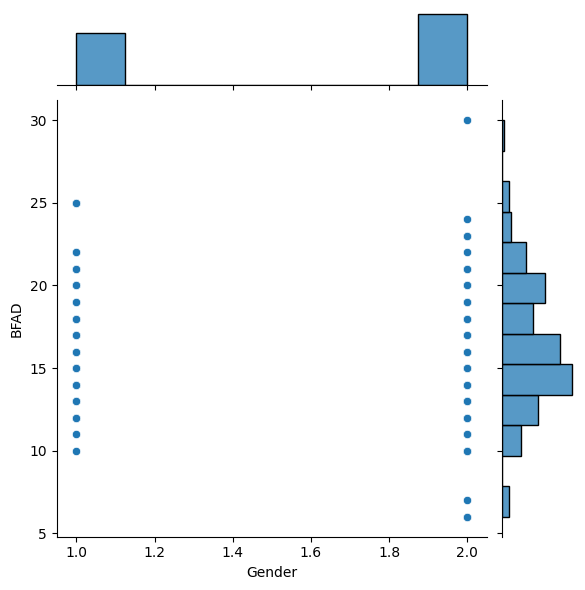

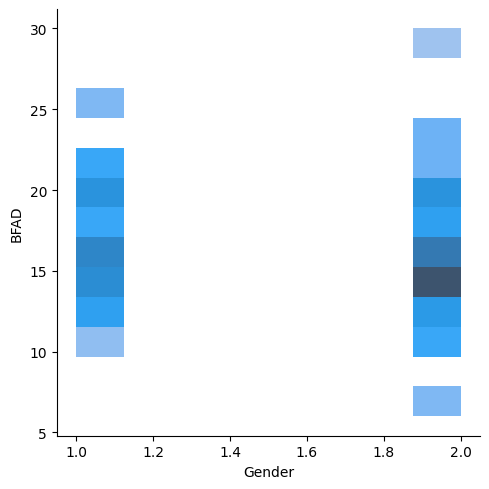

In [ ]:
import seaborn as sns
sns.jointplot(data=df, x= 'Gender', y= 'BFAD')
sns.displot(data=df, x= 'Gender', y= 'BFAD')

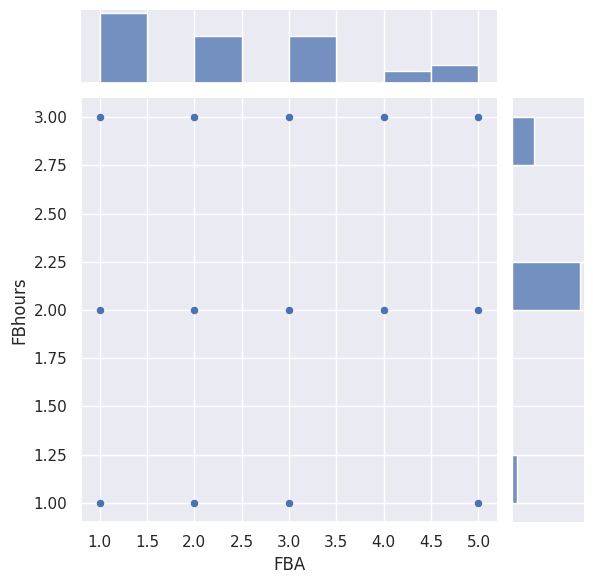

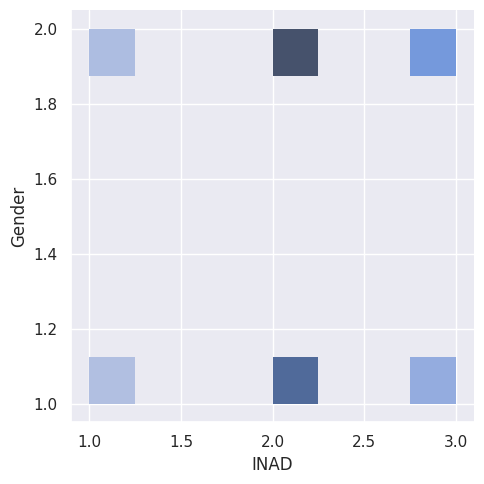

In [ ]:

import seaborn as sns
import seaborn as sns; sns.set(style="darkgrid", color_codes=True)
sns.jointplot(data=df, x= 'FBA', y= 'FBhours')
sns.displot(data=df, x= 'INAD', y= 'Gender')

In [ ]:
df

,Age,Gender,Religion,Education,Location,Programstudied,PersonalFinance,MaritalStatuts,Devices,Source,...,BFAD,INAD,FAD,Age_cat,MLP_PredictedValue,MLP_PseudoProbability_1,MLP_PseudoProbability_2,BFAD_CAT,SMA,FRESMA
0,26.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,1.0,4.0,...,12.0,2.0,2.0,1.0,2.0,0.432605,0.567395,2.0,1.0,2.0
1,27.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,2.0,3.0,...,13.0,2.0,2.0,1.0,2.0,0.432605,0.567395,2.0,2.0,2.0
2,25.0,2.0,1.0,1.0,4.0,1.0,2.0,2.0,3.0,4.0,...,14.0,1.0,1.0,1.0,2.0,0.467756,0.532244,2.0,2.0,2.0
3,27.0,1.0,1.0,3.0,4.0,2.0,2.0,2.0,3.0,4.0,...,15.0,2.0,2.0,1.0,2.0,0.432605,0.567395,2.0,2.0,2.0
4,28.0,2.0,1.0,3.0,4.0,3.0,1.0,3.0,2.0,4.0,...,30.0,2.0,2.0,1.0,2.0,0.432605,0.567395,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-25-e76816b1e561>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


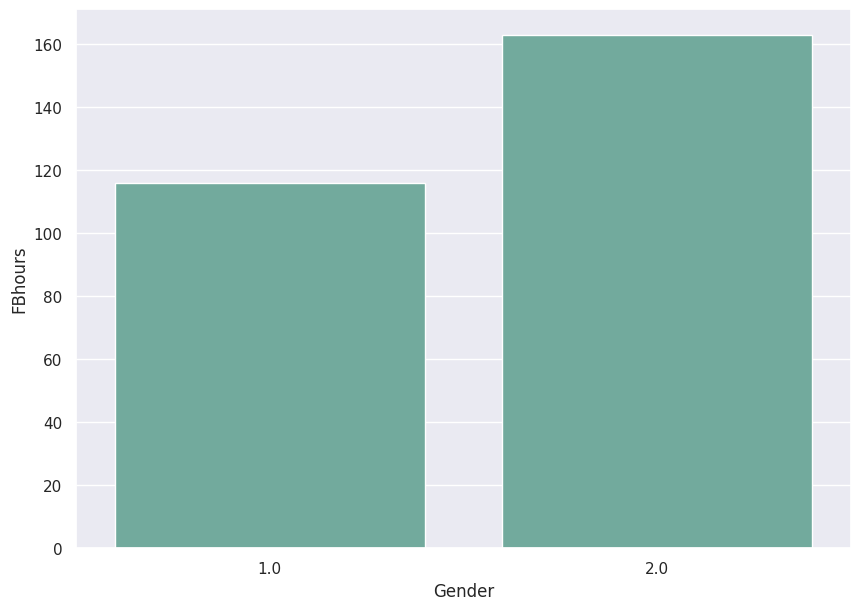

In [ ]:
# import libraries
import seaborn as sns
import matplotlib.pyplot as plt
# set plot style: grey grid in the background:
sns.set(style="darkgrid")
# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="Gender", 
    y="FBhours", 
    data=df, 
    estimator= sum , 
    ci=None, 
    color='#69b3a2');

<ipython-input-26-0ad34c574e75>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


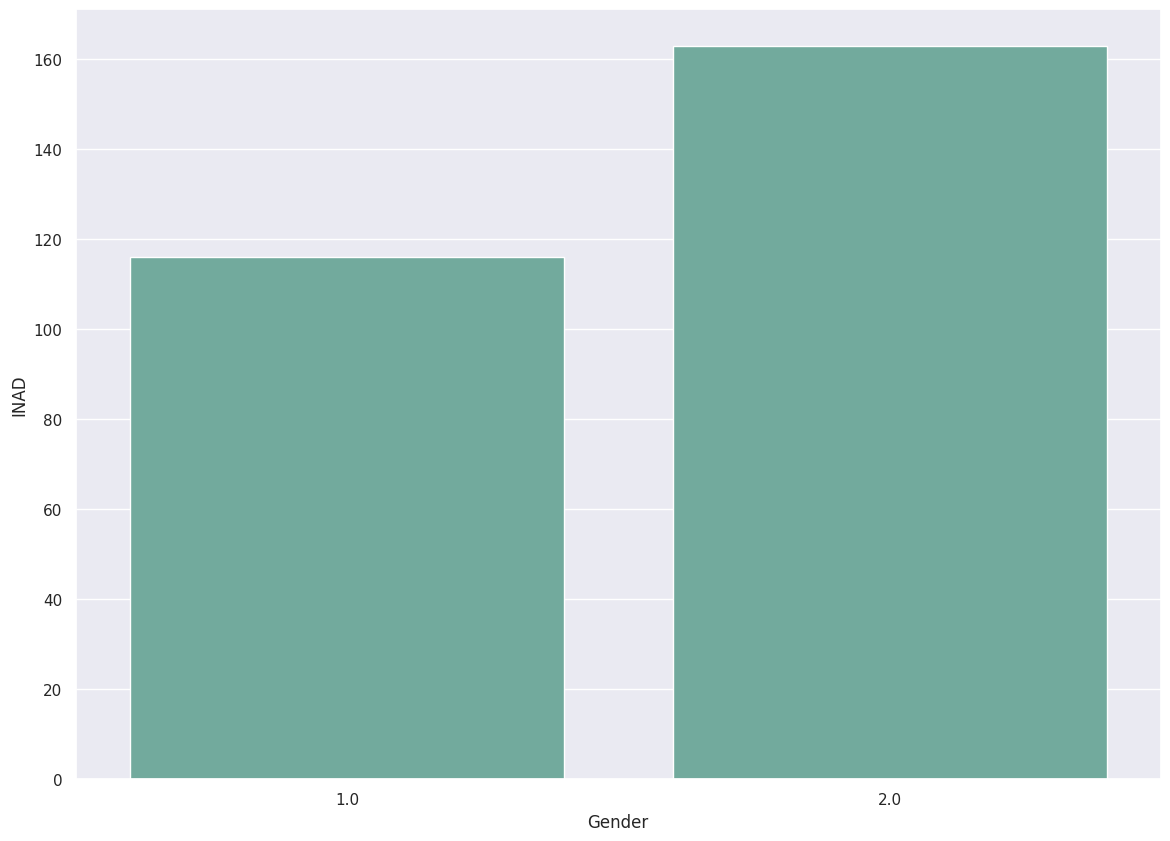

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 10))

# plot a bar chart
sns.barplot(
    y="INAD", 
    x="Gender", 
    data=df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

<Axes: xlabel='Count', ylabel='Gender'>

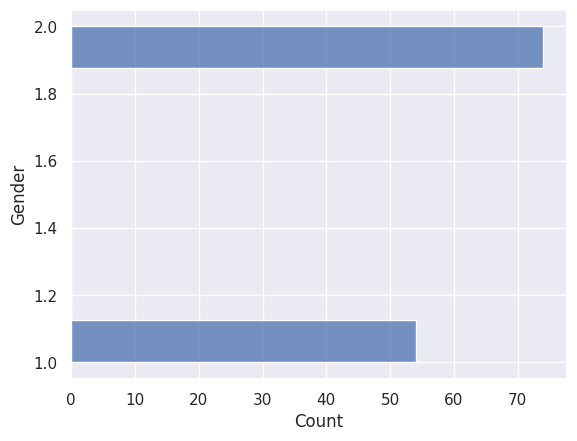

In [ ]:
sns.histplot(data=df, y="Gender")

<Axes: xlabel='Gender', ylabel='Count'>

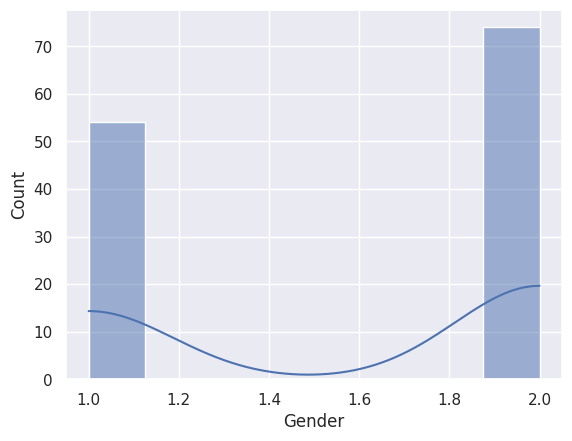

In [ ]:
sns.histplot(data=df, x="Gender", kde=True)

<Axes: xlabel='Gender', ylabel='Count'>

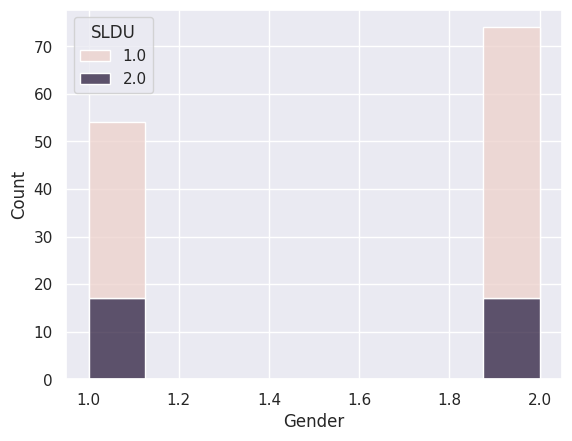

In [ ]:
sns.histplot(data=df, x="Gender", hue="SLDU", multiple="stack")

<Axes: xlabel='Gender', ylabel='Count'>

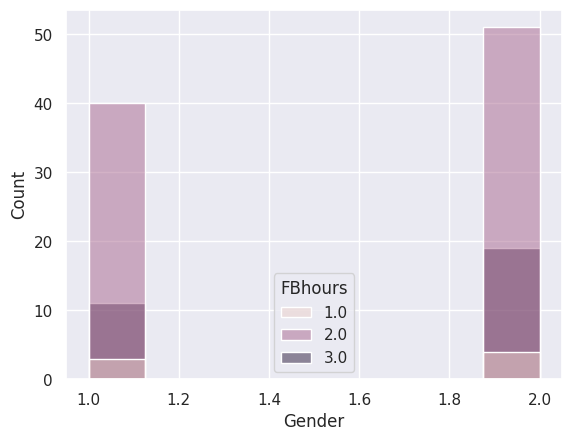

In [ ]:
sns.histplot(data=df, x="Gender", hue="FBhours")

<Axes: xlabel='Gender', ylabel='Count'>

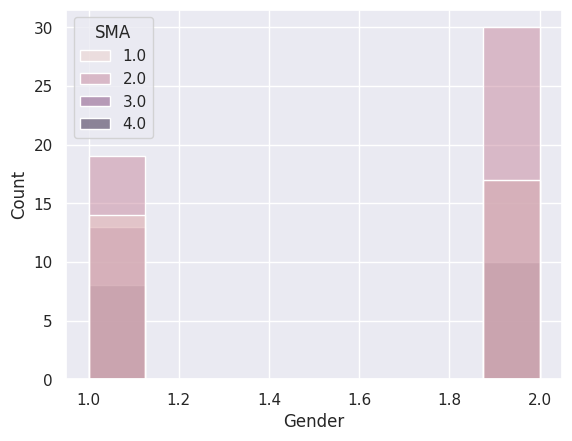

In [ ]:
sns.histplot(data=df, x="Gender", hue="SMA")

<Axes: xlabel='Gender', ylabel='Count'>

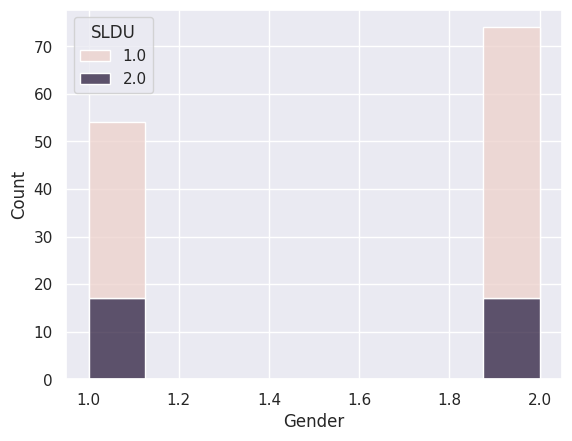

In [ ]:
sns.histplot(data=df, x="Gender", hue="SLDU", multiple="stack")

<Axes: xlabel='Gender', ylabel='Count'>

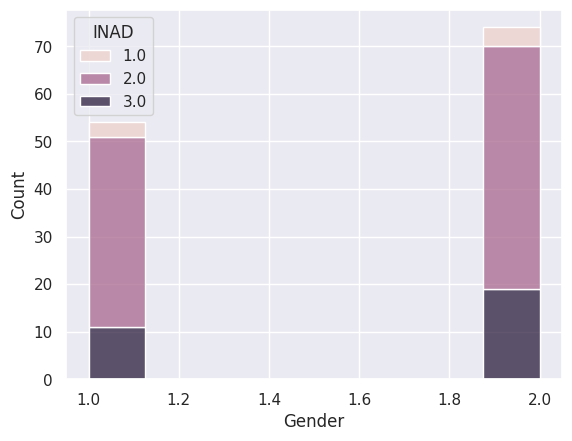

In [ ]:
sns.histplot(data=df, x="Gender", hue="INAD", multiple="stack")

<Axes: xlabel='Gender', ylabel='Count'>

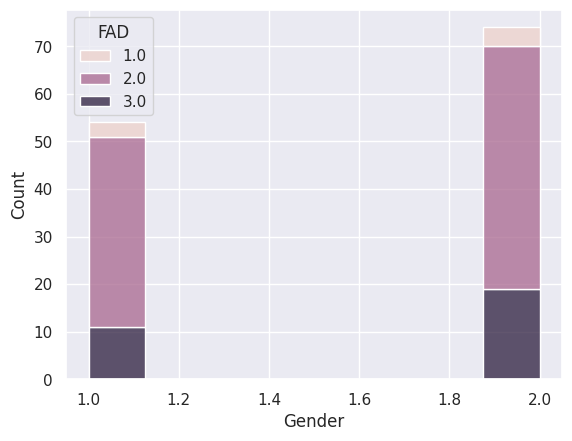

In [ ]:
sns.histplot(data=df, x="Gender", hue="FAD", multiple="stack")


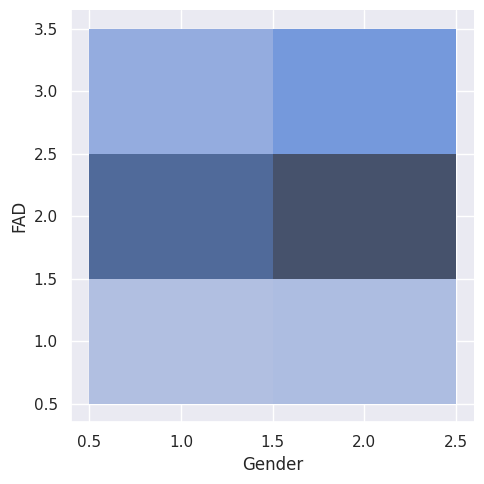

In [ ]:
sns.displot(data=df, x="Gender",y="FAD", stat="percent", discrete=True)

<Axes: xlabel='Gender', ylabel='FAD'>

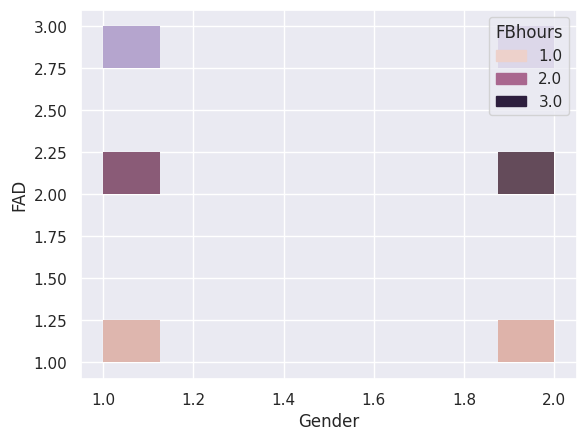

In [ ]:
sns.histplot(data=df, x="Gender",y="FAD", hue="FBhours", multiple="dodge", shrink=.8)

<ipython-input-36-3ac15deac103>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='Gender', y='FBhours', data=df, ci=None, palette="muted",orient='v', )


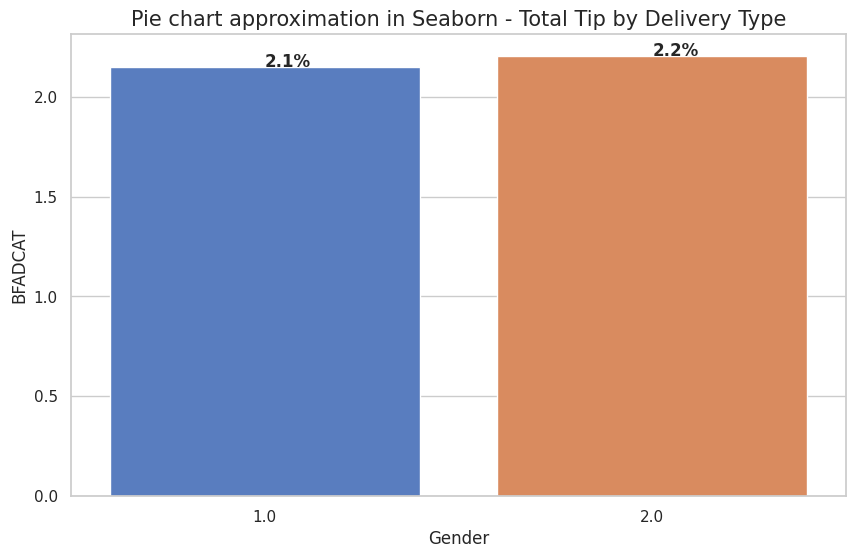

In [ ]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x='Gender', y='FBhours', data=df, ci=None, palette="muted",orient='v', )
ax.set_title("Pie chart approximation in Seaborn - Total Tip by Delivery Type", fontsize=15)
ax.set_xlabel ("Gender")
ax.set_ylabel ("BFADCAT")
# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )
bar.savefig("Seaborn_Pie_Chart.png");

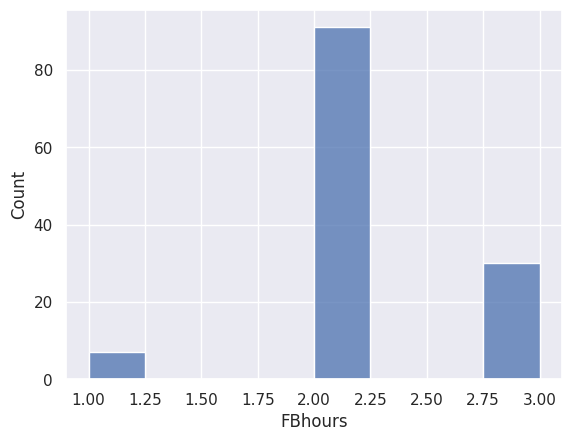

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns.histplot(data=df, x="FBhours")
plt.show()

<ipython-input-56-972d6f141366>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["FRESMA"])


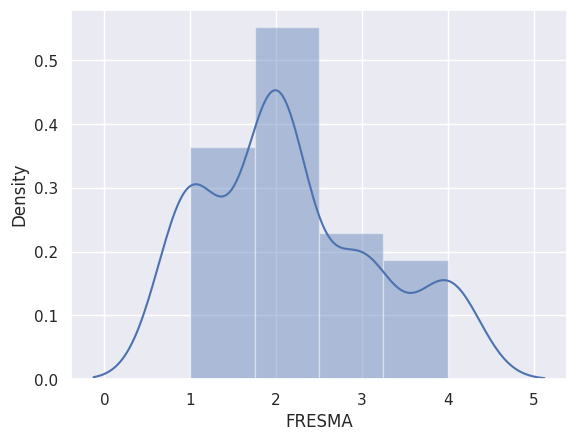

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns.distplot(df["FRESMA"])
plt.show()

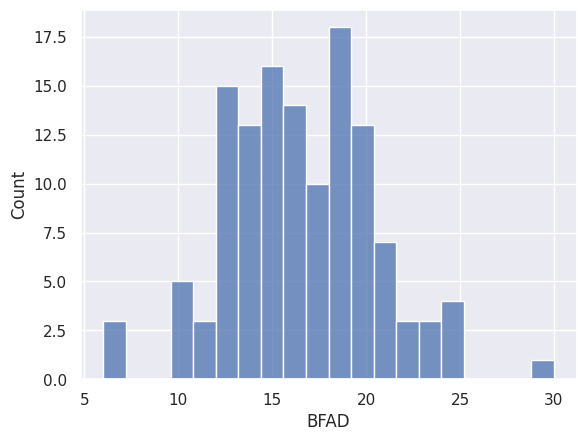

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
sns.histplot(data=df, x="BFAD", bins=20)
plt.show()

<ipython-input-40-aaa0ea076556>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( a=df["BFAD"], hist=True, kde=False, rug=False )


<Axes: xlabel='BFAD'>

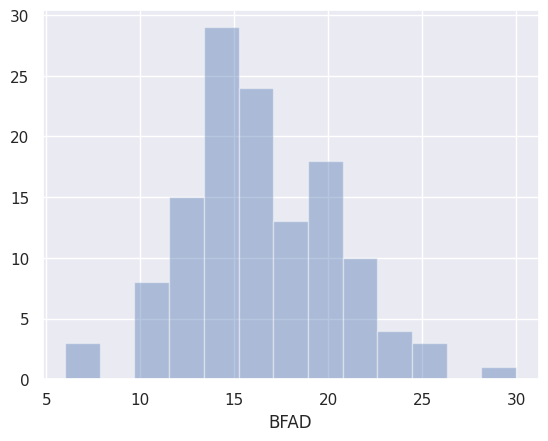

In [ ]:
import seaborn as sns
# Plot the histogram thanks to the distplot function
sns.distplot( a=df["BFAD"], hist=True, kde=False, rug=False )

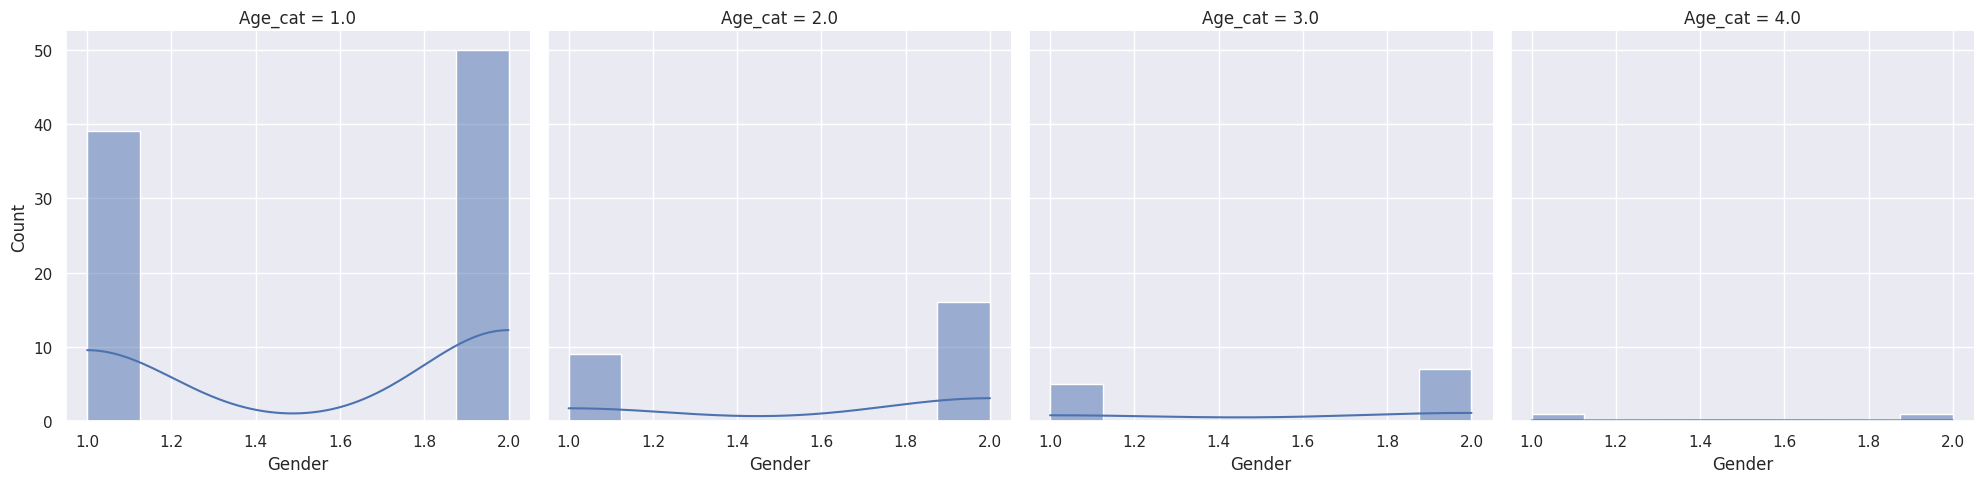

In [ ]:
sns.displot(data=df, x="Gender", col="Age_cat", kde=True)

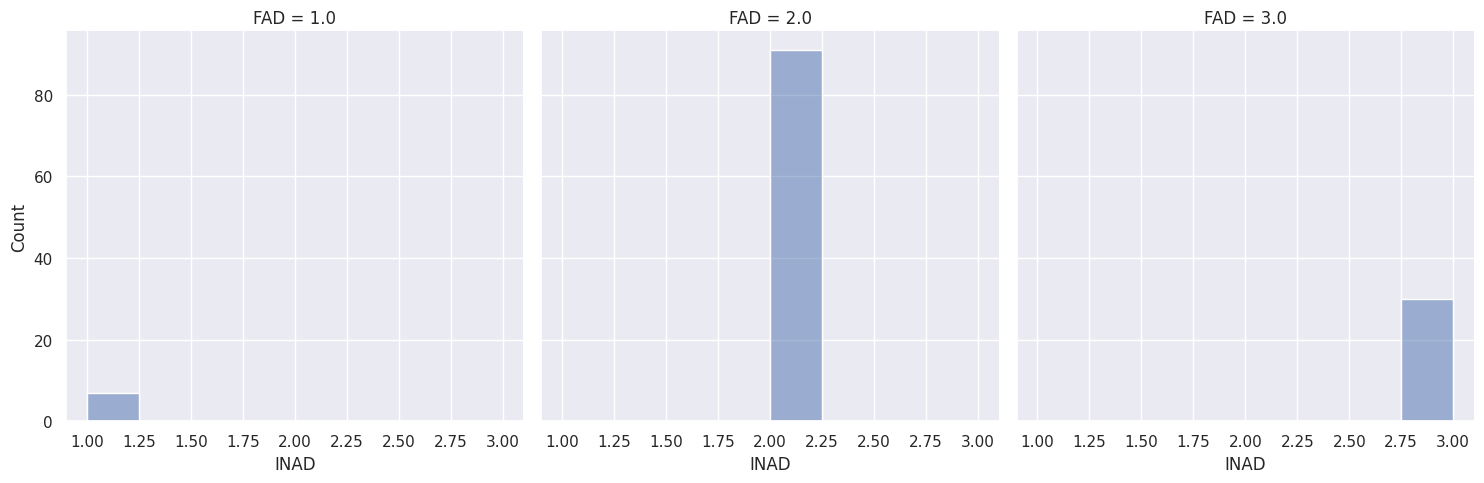

In [ ]:
sns.displot(data=df, x="INAD", col="FAD", kde=True)

In [ ]:
df

,Age,Gender,Religion,Education,Location,Programstudied,PersonalFinance,MaritalStatuts,Devices,Source,...,BFAD,INAD,FAD,Age_cat,MLP_PredictedValue,MLP_PseudoProbability_1,MLP_PseudoProbability_2,BFAD_CAT,SMA,FRESMA
0,26.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,1.0,4.0,...,12.0,2.0,2.0,1.0,2.0,0.432605,0.567395,2.0,1.0,2.0
1,27.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,2.0,3.0,...,13.0,2.0,2.0,1.0,2.0,0.432605,0.567395,2.0,2.0,2.0
2,25.0,2.0,1.0,1.0,4.0,1.0,2.0,2.0,3.0,4.0,...,14.0,1.0,1.0,1.0,2.0,0.467756,0.532244,2.0,2.0,2.0
3,27.0,1.0,1.0,3.0,4.0,2.0,2.0,2.0,3.0,4.0,...,15.0,2.0,2.0,1.0,2.0,0.432605,0.567395,2.0,2.0,2.0
4,28.0,2.0,1.0,3.0,4.0,3.0,1.0,3.0,2.0,4.0,...,30.0,2.0,2.0,1.0,2.0,0.432605,0.567395,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


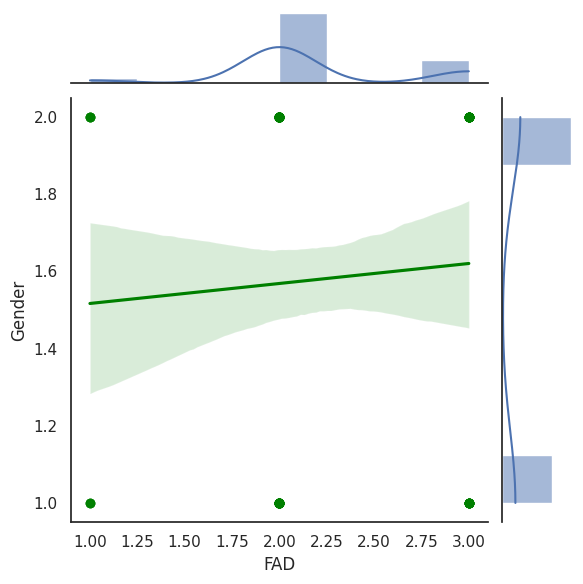

In [ ]:
import seaborn as sns; sns.set(style="white", color_codes=True)
sns.jointplot(x="FAD", y="Gender", data=df, kind='reg',
                  joint_kws={'color':'green'}) # Scatter and regression all green
                  

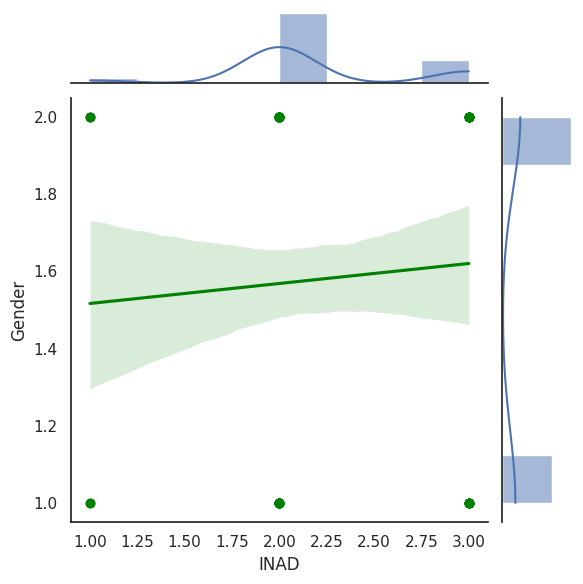

In [ ]:
import seaborn as sns; sns.set(style="white", color_codes=True)
sns.jointplot(x="INAD", y="Gender", data=df, kind='reg',
                  joint_kws={'color':'green'}) # Scatter and regression all green

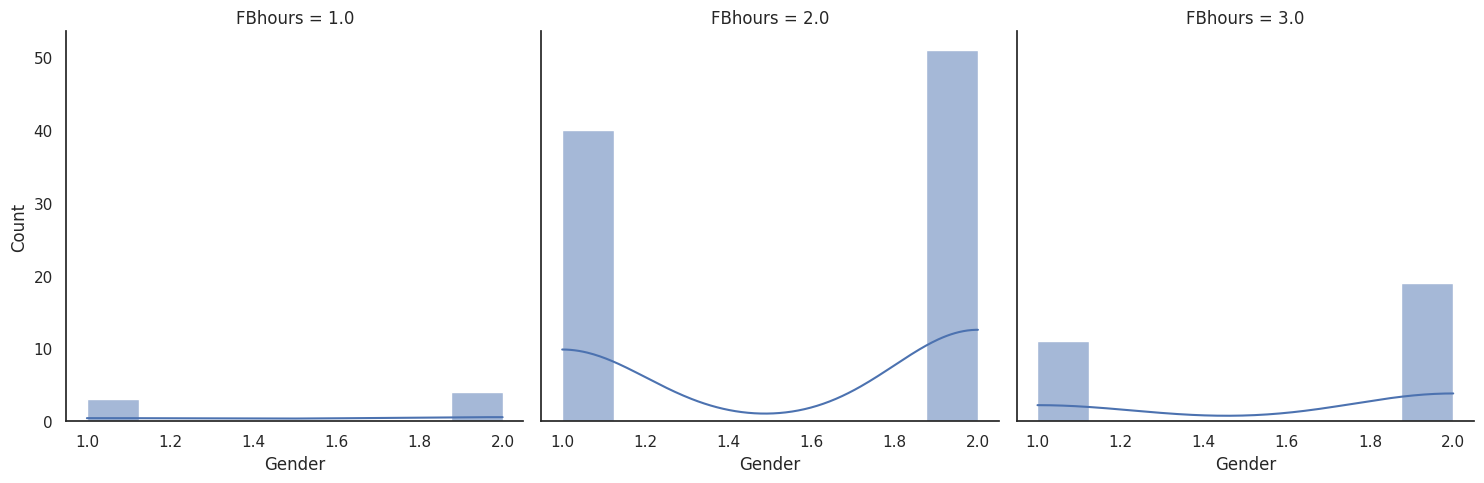

In [ ]:
sns.displot(data=df, x="Gender", col="FBhours", kde=True)

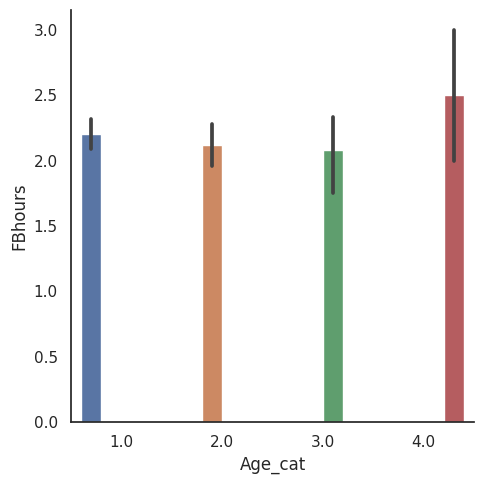

In [ ]:
sns.catplot(data=df, kind="bar", x="Age_cat", y="FBhours", hue="Age_cat")

<Axes: xlabel='Gender', ylabel='SMA'>

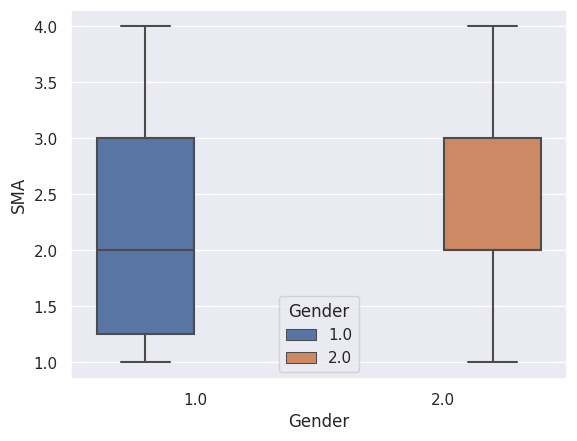

In [ ]:
sns.boxplot(x='Gender', y='SMA', data=df, hue='Gender')

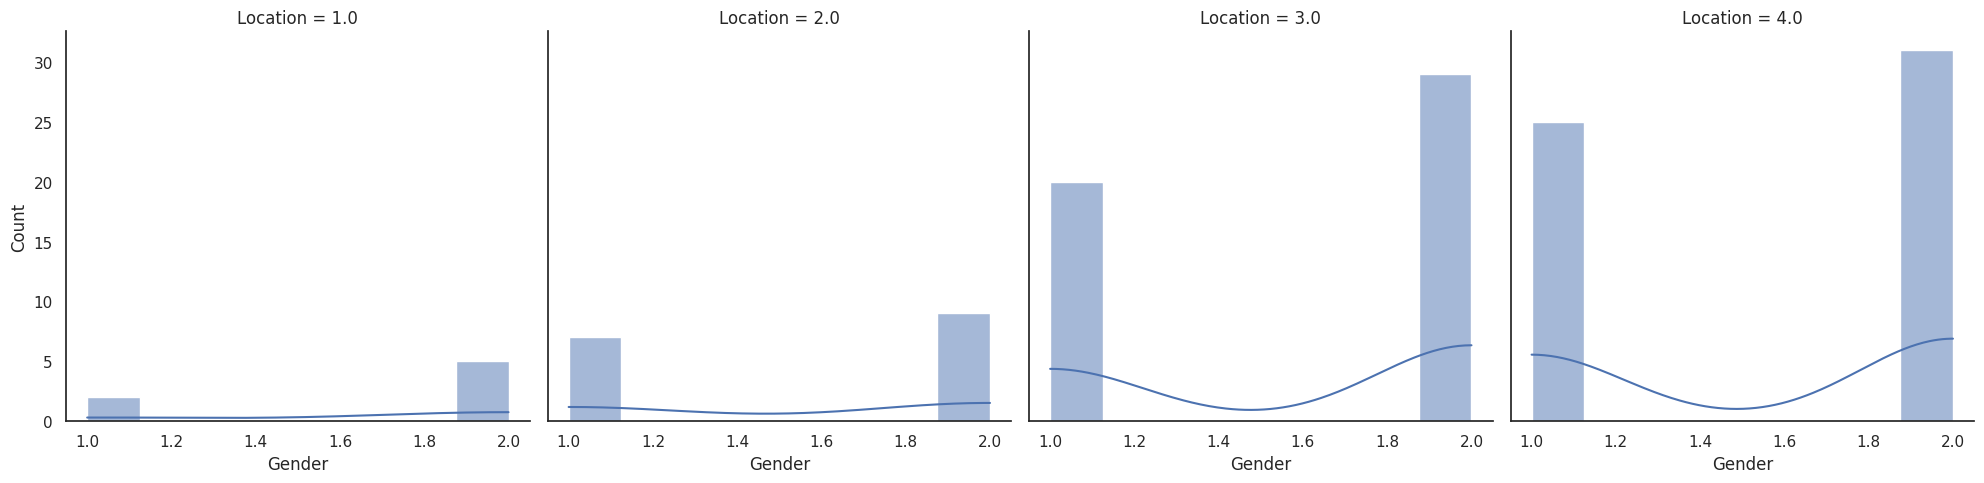

In [ ]:
sns.displot(data=df, x="Gender", col="Location", kde=True)

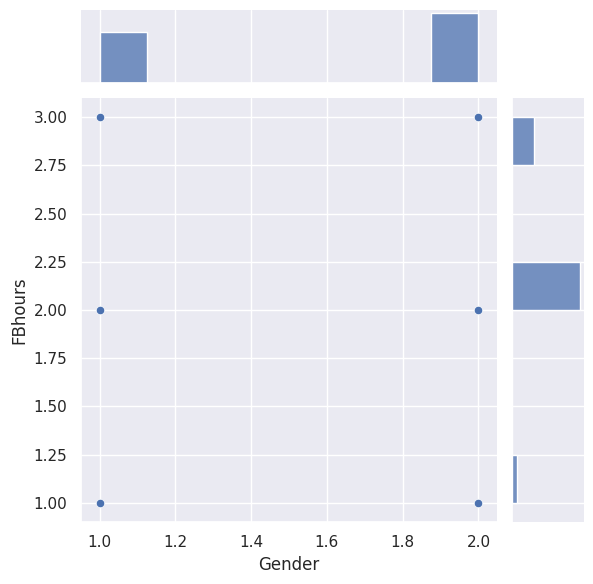

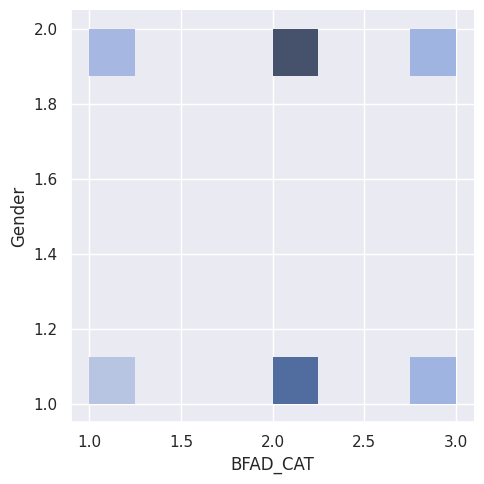

In [ ]:
import seaborn as sns
import seaborn as sns; sns.set(style="darkgrid", color_codes=True)
sns.jointplot(data=df, x= 'Gender', y= 'FBhours')
sns.displot(data=df, x= 'BFAD_CAT', y= 'Gender')

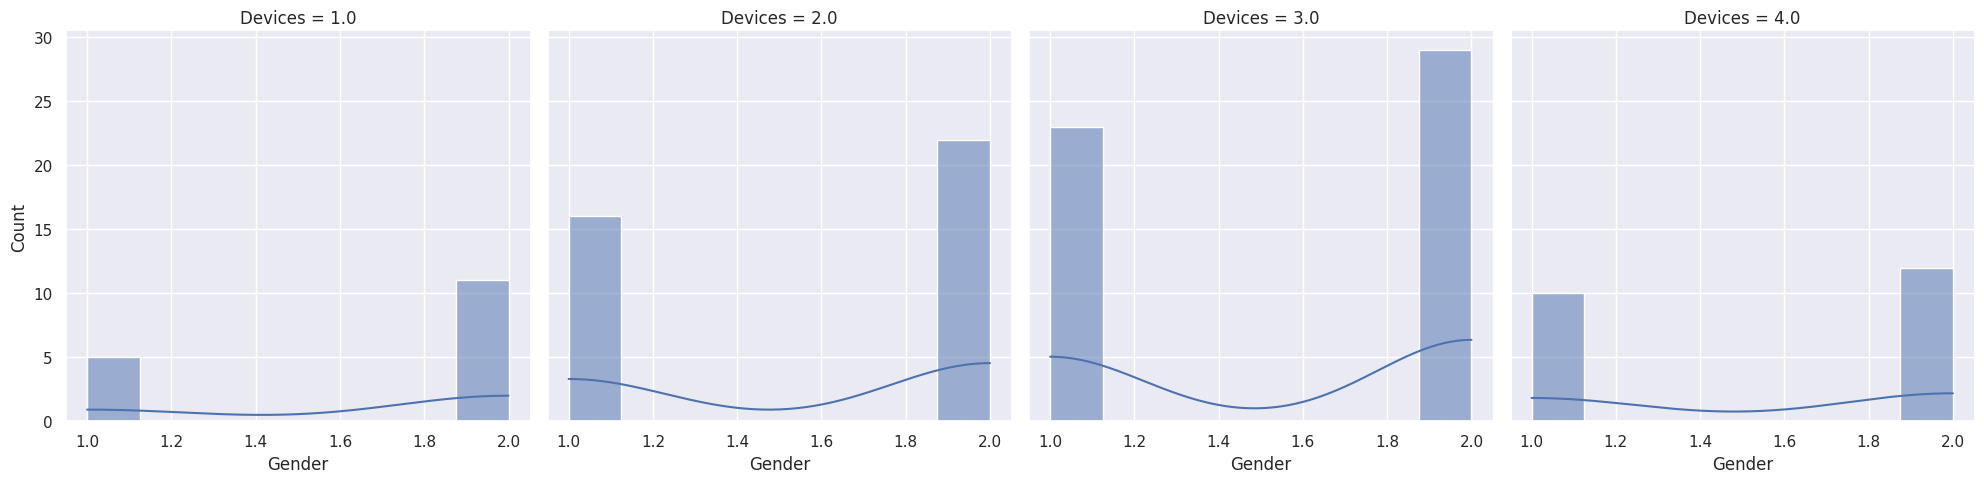

In [ ]:
sns.displot(data=df, x="Gender", col="Devices", kde=True)

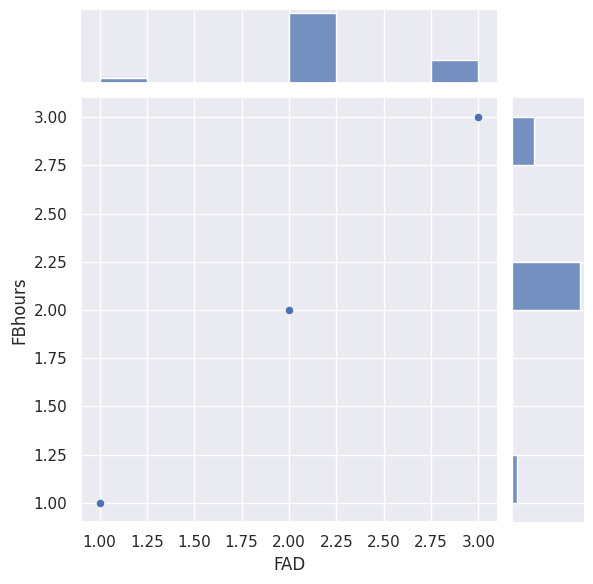

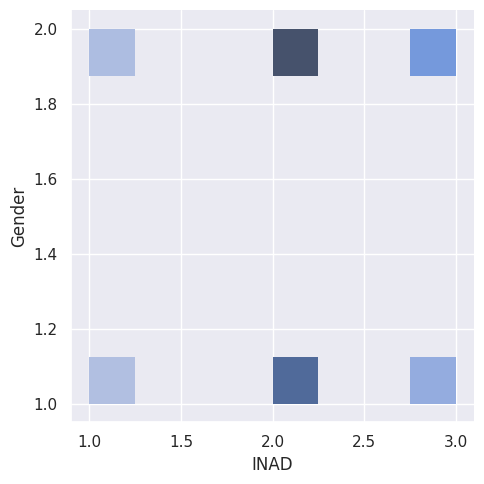

In [ ]:
import seaborn as sns
import seaborn as sns; sns.set(style="darkgrid", color_codes=True)
sns.jointplot(data=df, x= 'FAD', y= 'FBhours')
sns.displot(data=df, x= 'INAD', y= 'Gender')

<ipython-input-53-a683bf8e8668>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


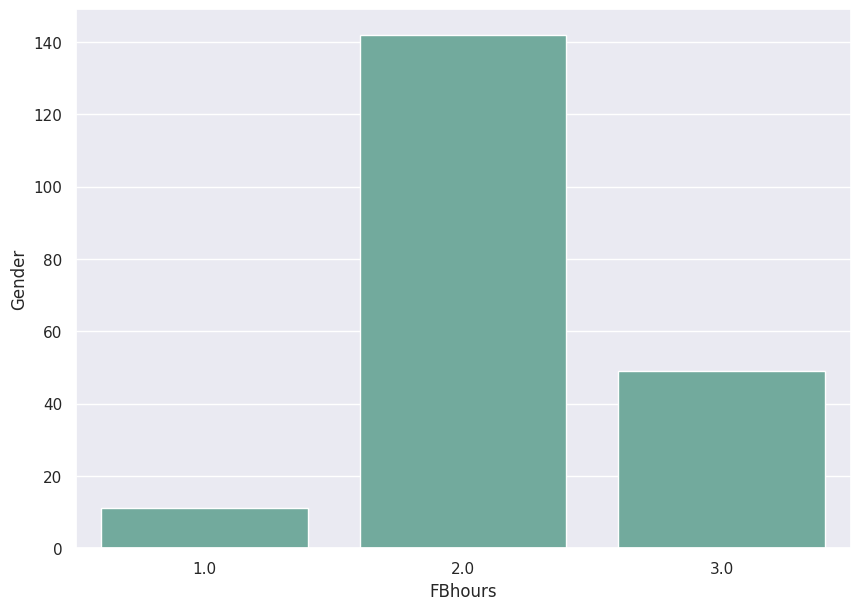

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# set plot style: grey grid in the background:
sns.set(style="darkgrid")
# Set the figure size
plt.figure(figsize=(10, 7))
# plot a bar chart
sns.barplot(
    x="FBhours", 
    y="Gender", 
    data=df, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2');

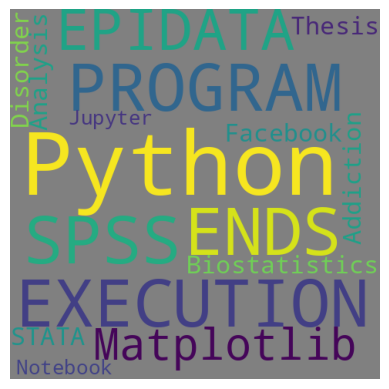

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Create a list of word
text=(" THE PROGRAM EXECUTION ENDS: SPSS R  Python EPIDATA Matplotlib Biostatistics Facebook Addiction Disorder Thesis R-Analysis STATA Python Jupyter Notebook ")
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480,background_color="grey", margin=0).generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='kaiser')
plt.axis("off")
plt.margins(x=1, y=1)
plt.show()